# Notebook for Stock Prediction

## Prepare Data

In [71]:
# import modules
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [68]:
# We would like all available data from 01/01/2010 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

data = yf.download('AAPL',start_date, end_date)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473150,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800
...,...,...,...,...,...,...
2016-12-23,28.897499,29.129999,28.897499,29.129999,27.038567,56998000
2016-12-27,29.129999,29.450001,29.122499,29.315001,27.210287,73187600
2016-12-28,29.379999,29.504999,29.049999,29.190001,27.094257,83623600


In [57]:
close = data['Close']
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
close = close.reindex(all_weekdays)
close = close.fillna(method='ffill')
close

C:\Users\camel\AppData\Local\Temp\ipykernel_11476\1115136731.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close = close.fillna(method='ffill')


2010-01-01          NaN
2010-01-04     7.643214
2010-01-05     7.656429
2010-01-06     7.534643
2010-01-07     7.520714
                ...    
2016-12-26    29.129999
2016-12-27    29.315001
2016-12-28    29.190001
2016-12-29    29.182501
2016-12-30    28.955000
Freq: B, Name: Close, Length: 1826, dtype: float64

In [58]:
short_rolling = close.rolling(window=20).mean()
long_rolling = close.rolling(window=100).mean()

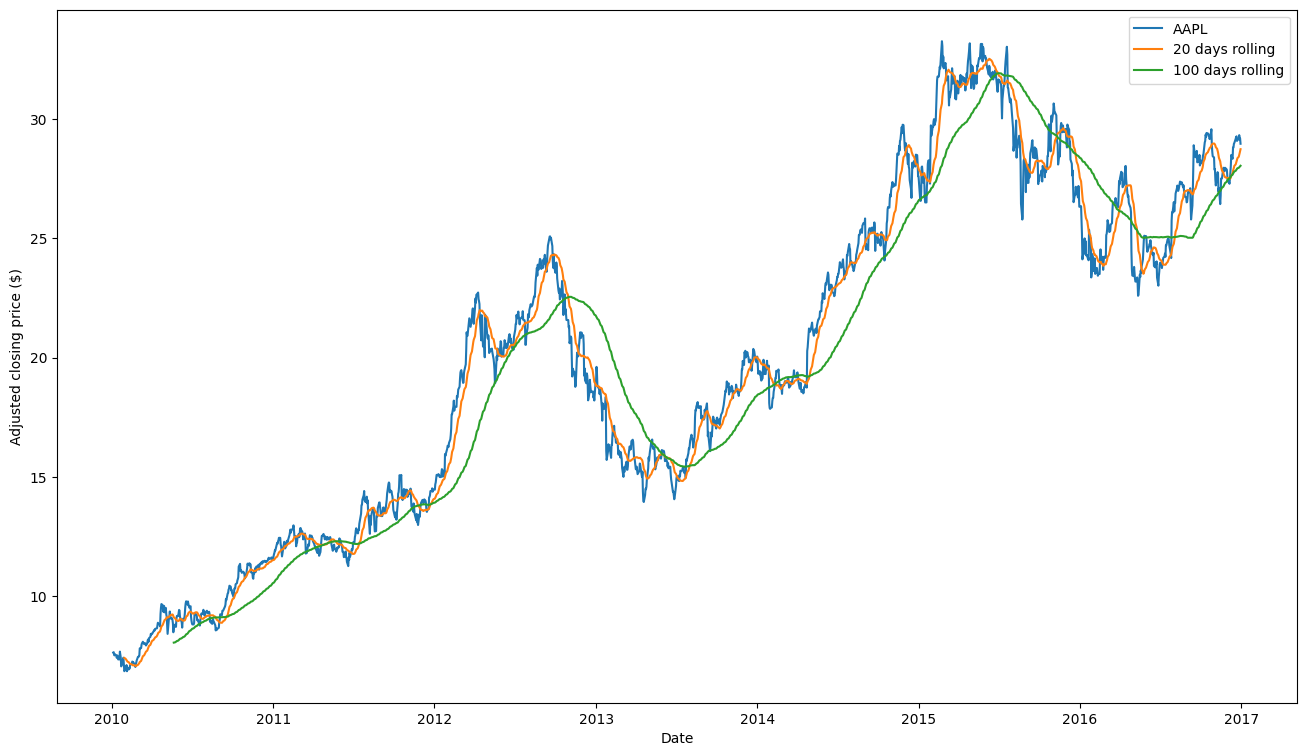

In [65]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label='AAPL')
ax.plot(short_rolling.index, short_rolling, label='20 days rolling')
ax.plot(long_rolling.index, long_rolling, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
plt.plot();

## Math Approach

In [69]:
returns = close.pct_change(1)
returns

2010-01-01         NaN
2010-01-04         NaN
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
                ...   
2016-12-26    0.000000
2016-12-27    0.006351
2016-12-28   -0.004264
2016-12-29   -0.000257
2016-12-30   -0.007796
Freq: B, Name: Close, Length: 1826, dtype: float64

In [72]:
log_returns = np.log(close).diff()
log_returns.head()

2010-01-01         NaN
2010-01-04         NaN
2010-01-05    0.001727
2010-01-06   -0.016034
2010-01-07   -0.001850
Freq: B, Name: Close, dtype: float64

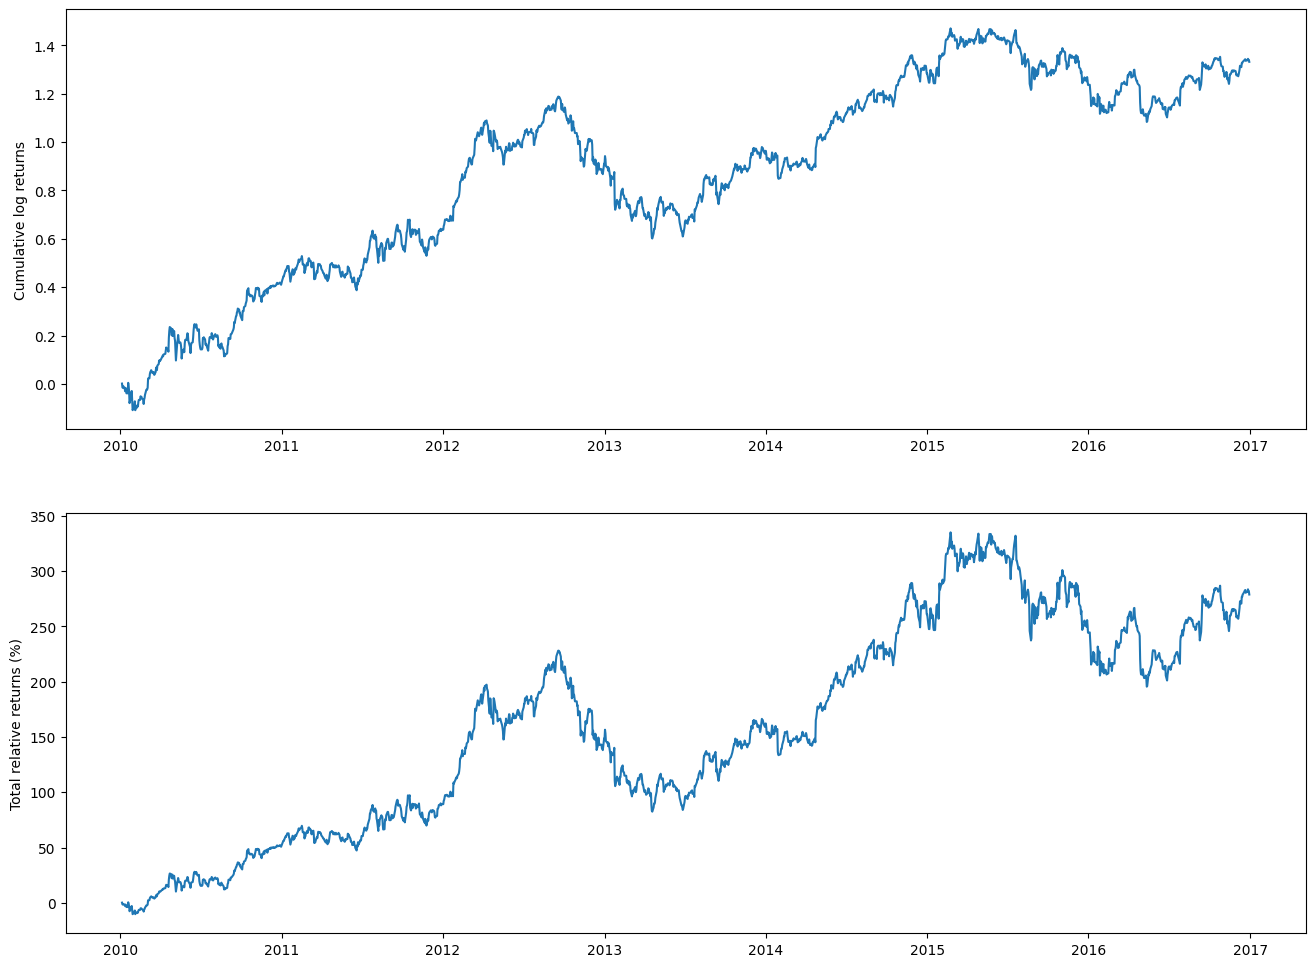

In [75]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(log_returns.index, log_returns.cumsum())
ax1.set_ylabel('Cumulative log returns')

ax2.plot(log_returns.index, 100*(np.exp(log_returns.cumsum()) - 1))
ax2.set_ylabel('Total relative returns (%)')

plt.show()